In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

from dataloader import prepare_data, create_generators, visualize_images


# Select classes and prepare data
classes = ["Angelina Jolie", "Brad Pitt", "Denzel Washington",
           "Hugh Jackman", "Jennifer Lawrence"]
prepare_data(classes)

# Create data generators
train_dir = "train_data"
test_dir = "test_data"
train_generator, test_generator = create_generators(train_dir, test_dir)

C:\Users\sarah\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 497 images belonging to 5 classes.
Found 295 images belonging to 5 classes.


In [2]:
# Load the baseline model
baseline_model = tf.keras.models.load_model('baseline_model.h5')

# Load the augmented model
augmented_model = tf.keras.models.load_model('augmented_model.h5')

In [3]:
# Make predictions using both models
baseline_predictions = baseline_model.predict(test_generator)
augmented_predictions = augmented_model.predict(test_generator)

C:\Users\sarah\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step


In [4]:
# Get true labels from the test generator
true_labels = test_generator.classes

In [6]:
import numpy as np

# Convert true labels to one-hot encoding
one_hot_true_labels = np.zeros((len(true_labels), len(classes)))
for i, label in enumerate(true_labels):
    one_hot_true_labels[i, label] = 1

# Calculate ROC curves and AUC scores for each class
baseline_fpr = dict()
baseline_tpr = dict()
baseline_auc = dict()
for i in range(len(classes)):
    baseline_fpr[i], baseline_tpr[i], _ = roc_curve(one_hot_true_labels[:, i], baseline_predictions[:, i])
    baseline_auc[i] = auc(baseline_fpr[i], baseline_tpr[i])

augmented_fpr = dict()
augmented_tpr = dict()
augmented_auc = dict()
for i in range(len(classes)):
    augmented_fpr[i], augmented_tpr[i], _ = roc_curve(one_hot_true_labels[:, i], augmented_predictions[:, i])
    augmented_auc[i] = auc(augmented_fpr[i], augmented_tpr[i])


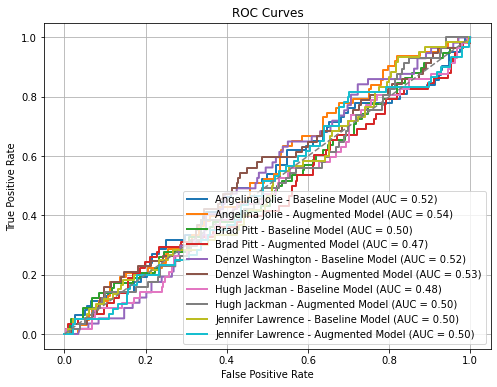

In [7]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(baseline_fpr[i], baseline_tpr[i], lw=2, label=f'{classes[i]} - Baseline Model (AUC = {baseline_auc[i]:.2f})')
    plt.plot(augmented_fpr[i], augmented_tpr[i], lw=2, label=f'{classes[i]} - Augmented Model (AUC = {augmented_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()